# Primeira análise das reviews do Kaggle base 'winemag-data-130k-v2'

### import libs

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### ler datasets

In [3]:
df = pd.read_csv(r'winemag-data-130k-v2.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [5]:
df.head(2)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


# Distribuição dos 'points'
### repare que não existem avaliações menores que 80 points

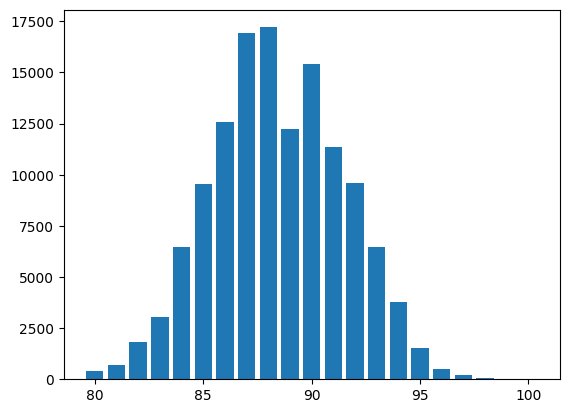

In [6]:
fig, ax = plt.subplots()

x = df.groupby('points')['points'].value_counts().index
y = df.groupby('points')['points'].value_counts().values

ax.bar(x, y)

plt.show()

## Distribuição dos 'taster_name'
### olhando rápido, parece uma distribuição razoável e é bom que não está muito pulverizado. Existem apenas 19 avaliadores

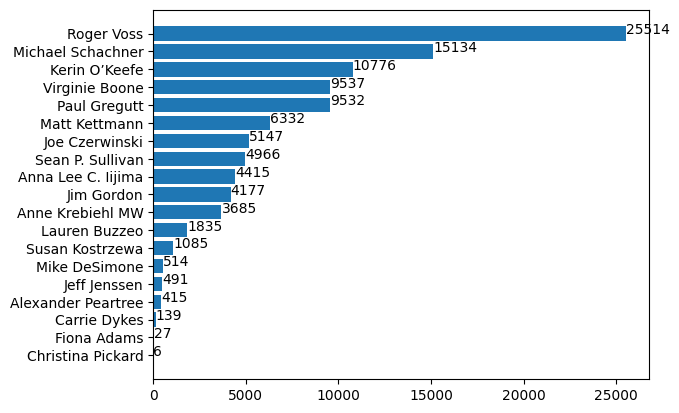

In [7]:
fig, ax = plt.subplots()

x = df.groupby('taster_name')['taster_name'].value_counts().sort_values(ascending=True).index
y = df.groupby('taster_name')['taster_name'].value_counts().sort_values(ascending=True).values

for i, y_value in enumerate(y):
    plt.text(y[i], x[i], y[i])

ax.barh(x, y)

plt.show()

## Quantidade de 'variety': 708 variedades
### ao meu ver, está bem pulverizado...

In [8]:
len(df.variety.unique())

708

## Análise das palavras mais frequentes na descrição

In [9]:
words = df.description

words = words.str.replace('.', '')
words = words.str.replace(',', '')
words = words.str.lower()
words = words.str.split(' ')

In [10]:
words = dict(words)

In [11]:
words_rslt = {
    'wine_id': [],
    'word_in_sentence': [],
    'word': []
}

for wine_id in range(0, len(words)):
    for i, word in enumerate(words[wine_id]):
        
        words_rslt['wine_id'].append(wine_id)
        words_rslt['word_in_sentence'].append(i)
        words_rslt['word'].append(word)
        

In [12]:
df_words = pd.DataFrame(words_rslt)

### Visualizando as 100 palavras mais frequentes nas avaliações

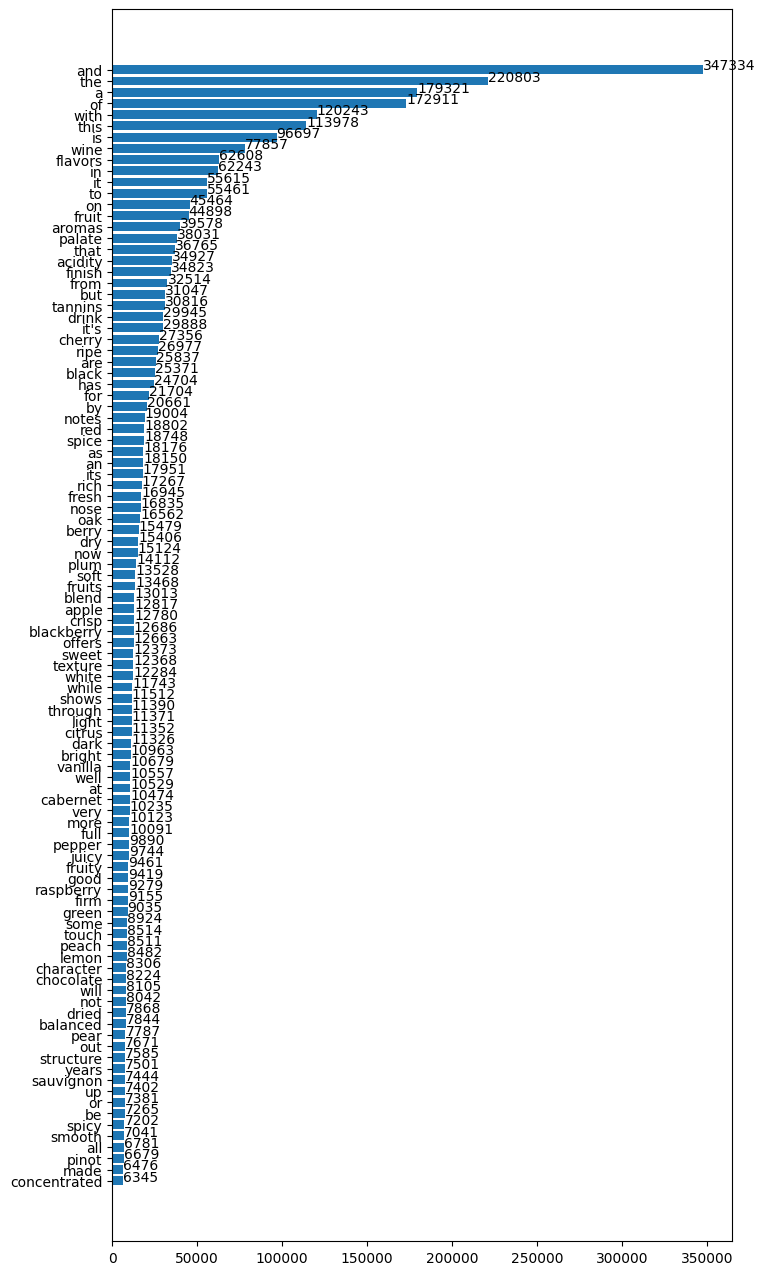

In [27]:
fig, ax = plt.subplots(figsize=(8,16))

x = df_words.groupby('word')['word'].value_counts().sort_values(ascending=True).index[-100:]
y = df_words.groupby('word')['word'].value_counts().sort_values(ascending=True).values[-100:]

for i, y_value in enumerate(y):
    plt.text(y[i], x[i], y[i])

ax.barh(x, y)

plt.show()